In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn import set_config
set_config(transform_output='pandas')

In [44]:
df=pd.read_csv('df_regression.csv')

In [45]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'pub_rec', 'revol_util', 'application_type',
       'bc_util', 'loss_amnt'],
      dtype='object')

#THINGS TO DO

loan_amnt= scale

term = separate from mixed variable

int_rate = scale , outlier

installments = outliers,correlation treatment with loan_amnt(remove)

grade = ordinal encoding

subgrade = ordinal encoding

emp_length = Binning

home_ownership = ohe

annual_inc = scale , outlier

verification_status = ohe

issue_d	= mixed variable separation and date time

purpose	= ohe

dti	=  outlier

delinq_2yrs	= remove very noisy

earliest_cr_line	= extract no of years

fico_range_low	= credit score binning

pub_rec	= binning

revol_util	= percentage of revol cr limit binarization

application_type	= imbalanced to do or remove

bc_util	= correlation treatment with  revol util binarization

loss_amnt=target variable and to apply transformation

In [46]:
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,pub_rec,revol_util,application_type,bc_util,loss_amnt
19063,13000.0,36 months,14.65,448.43,C,C5,4 years,RENT,27000.0,Source Verified,...,credit_card,16.85,0.0,Dec-2010,720.0,0.0,20.6,Individual,22.5,8310.00
1817,7000.0,36 months,7.26,216.98,A,A4,10+ years,RENT,101000.0,Not Verified,...,debt_consolidation,13.00,0.0,Feb-1988,690.0,1.0,24.8,Individual,50.0,6451.42
33205,4000.0,36 months,12.29,133.42,C,C1,2 years,RENT,24000.0,Source Verified,...,debt_consolidation,27.50,0.0,Jul-2007,700.0,0.0,53.3,Individual,45.7,3816.90
8804,20000.0,36 months,9.99,645.25,B,B3,3 years,RENT,68000.0,Verified,...,debt_consolidation,32.26,0.0,Sep-2007,660.0,0.0,73.0,Individual,76.0,16666.66
43128,13400.0,60 months,19.99,354.95,E,E4,10+ years,RENT,47000.0,Verified,...,debt_consolidation,12.59,0.0,May-2007,670.0,1.0,48.0,Individual,49.0,13400.00


In [47]:
X=df.drop(['loss_amnt','application_type','int_rate','grade', 'sub_grade'],axis=1)
y=df['loss_amnt']

we need to app

In [48]:
y.skew()

np.float64(0.6356587368530997)

In [49]:
y=np.log1p(y)
y.skew()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


np.float64(-0.8270047856106147)

/tmp/ipython-input-4004554589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


[]

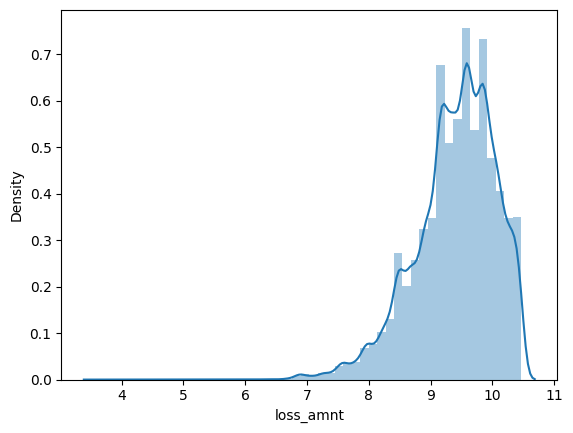

In [50]:
sns.distplot(y)
plt.plot()

In [51]:
num_cols=['loan_amnt','term','installment','emp_length','annual_inc','dti','delinq_2yrs','fico_range_low','pub_rec','revol_util','bc_util','earliest_cr_line']
cat_cols=['grade','sub_grade','home_ownership','verification_status','issue_d','purpose']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X1_train=X_train.copy()
X2_train=X_test.copy()

#1.Mixed Variable Separation

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import re

class TermTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed['term'] = X_transformed['term'].str.replace(' months', '', regex=False).astype(float)
        return X_transformed

class IssueDTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed['issue_d'] = pd.to_datetime(X_transformed['issue_d'], format='%b-%Y')
        X_transformed['issue_d'] = X_transformed['issue_d'].dt.strftime('%b')
        return X_transformed

class EmpLengthTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed['emp_length'] = X_transformed['emp_length'].replace('10+ years', '10')
        X_transformed['emp_length'] = X_transformed['emp_length'].replace('< 1 year', '0')
        X_transformed['emp_length'] = X_transformed['emp_length'].astype(str).apply(lambda x: float(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else (x if x == 'nan' else None))
        X_transformed['emp_length'] = X_transformed['emp_length'].replace('nan', np.nan).astype(float)
        return X_transformed

class EarliestCrLineTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed['earliest_cr_line'] = pd.to_datetime(
            X_transformed['earliest_cr_line'], format='%b-%Y', errors='coerce'
        ).dt.year
        return X_transformed

mixed_var_cols=['term','issue_d','emp_length','earliest_cr_line']
term_transformer=TermTransformer()
issue_d_transformer=IssueDTransformer()
earliest_cr_line_transformer = EarliestCrLineTransformer()
emp_length_transformer = EmpLengthTransformer()

#2.Handle missing values

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

cols_to_handle=['emp_length','dti','bc_util','revol_util']
freq_cols=['emp_length']
median_cols=['dti','bc_util','revol_util']
freq_imputer=SimpleImputer(strategy='most_frequent')
median_imputer=SimpleImputer(strategy='median')

#3.New Features Extraction

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime

cols_for_new_features = ['earliest_cr_line', 'installment', 'annual_inc', 'loan_amnt']

class NewFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # X is expected to have 'earliest_cr_line' (numeric year), 'installment', 'annual_inc', 'loan_amnt'
        current_year = 2015

        cr_history = pd.Series(np.nan, index=X.index)
        if 'earliest_cr_line' in X.columns and pd.api.types.is_numeric_dtype(X['earliest_cr_line']):
            cr_history = current_year - X['earliest_cr_line']

        installment_to_income_ratio = (X['installment'] / X['annual_inc'])
        installment_to_income_ratio = installment_to_income_ratio.replace([np.inf, -np.inf], np.nan).fillna(0)

        loan_to_inc_ratio = (X['loan_amnt'] / X['annual_inc'])
        loan_to_inc_ratio = loan_to_inc_ratio.replace([np.inf, -np.inf], np.nan).fillna(0)

        # Return  DF with only the new features
        return pd.DataFrame({
            'cr_history': cr_history,
            'installment_to_income_ratio': installment_to_income_ratio,
            'loan_to_inc_ratio': loan_to_inc_ratio
        }, index=X.index)

class NewFeatureAddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.new_feature_generator = NewFeatureGenerator()
        self.column_name_map = {
            'earliest_cr_line': 'earliest_cr_line_pipeline__earliest_cr_line',
            'installment': 'installment_passthrough__installment',
            'annual_inc': 'annual_inc_pipeline__annual_inc',
            'loan_amnt': 'loan_amnt_pipeline__loan_amnt'
        }

    def fit(self, X, y=None):
        X_for_generation_fit = pd.DataFrame(index=X.index)
        for gen_col, pipeline_col in self.column_name_map.items():
            if pipeline_col in X.columns:
                X_for_generation_fit[gen_col] = X[pipeline_col]
            else:
                raise ValueError(f"NewFeatureAddingTransformer.fit: Expected column '{pipeline_col}' not found in input X.")

        self.new_feature_generator.fit(X_for_generation_fit, y)
        return self

    def transform(self, X, y=None):
        X_for_generation_transform = pd.DataFrame(index=X.index)
        for gen_col, pipeline_col in self.column_name_map.items():
            if pipeline_col in X.columns:
                X_for_generation_transform[gen_col] = X[pipeline_col]
            else:
                raise ValueError(f"NewFeatureAddingTransformer.transform: Expected column '{pipeline_col}' not found in input X.")

        new_features_df = self.new_feature_generator.transform(X_for_generation_transform)

        # Concatenate new features with the existing DataFrame X (which contains all processed original columns)
        Xt_with_new_features = pd.concat([X, new_features_df], axis=1)
        return Xt_with_new_features



#4.Outlier Treatment

In [56]:
X_train['annual_inc'].quantile(0.99)

np.float64(230000.0)

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, capping_thresholds=None):
        if capping_thresholds is None:
            self.capping_thresholds = {
                'annual_inc': 230000.0,
                'dti': 100.0,
                'bc_util': 100.0,
                'revol_util': 100.0
            }
        else:
            self.capping_thresholds = capping_thresholds

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for col, threshold in self.capping_thresholds.items():
            if col in X_transformed.columns:
                #winsorization (capping) for upper outliers
                X_transformed[col] = np.where(X_transformed[col] > threshold, threshold, X_transformed[col])
        return X_transformed

#5.Binning

pub_rec=0-4,5-9,10-14,15-19

emp_length=<=3,4-9,>10

deling_2yrs=0-3,4-11,12-19,20-27

fico_range_low= < 600,600-649,650-699,>700

In [58]:
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np

def bin_pub_rec(X_df):
    series = X_df.iloc[:, 0]
    bins = [-0.1, 0.9, 2.9, 5.9, np.inf] # Bins for 0, 1-2, 3-5, >5
    labels = [0,1,2,3]
    return pd.cut(series, bins=bins, labels=False, right=True, include_lowest=True).to_frame(name=X_df.columns[0])

pub_rec_bin_transformer= FunctionTransformer(bin_pub_rec, feature_names_out='one-to-one')

def bin_emp_length(X_df):
    series = X_df.iloc[:, 0]
    bins = [-0.1, 3, 9, np.inf]
    labels = [0,1,2]
    return pd.cut(series, bins=bins, labels=False, right=True, include_lowest=True).to_frame(name=X_df.columns[0])

emp_length_bin_transformer = FunctionTransformer(bin_emp_length, feature_names_out='one-to-one')

def bin_delinq_2yrs(X_df):
    series = X_df.iloc[:, 0]
    bins = [-0.1, 3, 11, 19, np.inf] # Bins for 0-3, 4-11, 12-19, >19
    labels = [0,1,2,3]
    return pd.cut(series, bins=bins, labels=False, right=True, include_lowest=True).to_frame(name=X_df.columns[0])

delinq_2yrs_bin_transformer = FunctionTransformer(bin_delinq_2yrs, feature_names_out='one-to-one')

def bin_fico_range_low(X_df):
    series = X_df.iloc[:, 0]
    bins = [-1,649, 699,749, np.inf]
    labels = [0,1,2,3]
    return pd.cut(series, bins=bins, labels=False, right=True, include_lowest=True).to_frame(name=X_df.columns[0])

bin_fico_range_low_transformer = FunctionTransformer(bin_fico_range_low, feature_names_out='one-to-one')

#6.Binarizer

revol_util>75 1 else 0

bc_util > 80 1 else 0

In [59]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

def binarize_revol_util(X_df):
    series = X_df.iloc[:, 0]
    return (series > 75).astype(int).to_frame(name=X_df.columns[0])

revol_util_binarizer = FunctionTransformer(binarize_revol_util)

def binarize_bc_util(X_df):
    series = X_df.iloc[:, 0]
    return (series > 80).astype(int).to_frame(name=X_df.columns[0])

bc_util_binarizer = FunctionTransformer(binarize_bc_util)

cols_to_binarize=['revol_util','bc_util']

#7.Mathematical Transformations

In [60]:
from sklearn.preprocessing import FunctionTransformer

def apply_log1p_df(X_df):
    return pd.DataFrame(np.log1p(X_df.iloc[:,0]), index=X_df.index, columns=X_df.columns)
log_transformer=FunctionTransformer(apply_log1p_df)

log_transform_cols=["annual_inc","dti","loan_amnt"]

#8.Categorical column transformations

home_ownership=other than mortage,rent,own consider as "other"

purpose =other than debt_consolidation and credit_card consider as "other"

In [61]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def transform_home_ownership(X_df):
    series = X_df.iloc[:, 0]
    valid_ownership = ['MORTGAGE', 'RENT', 'OWN']
    return series.apply(lambda x: x if x in valid_ownership else 'Other').to_frame(name=X_df.columns[0])

home_ownership_transformer = FunctionTransformer(transform_home_ownership)

def transform_purpose(X_df):
    series = X_df.iloc[:, 0]
    valid_purpose = ['debt_consolidation', 'credit_card']
    return series.apply(lambda x: x if x in valid_purpose else 'Other').to_frame(name=X_df.columns[0])

purpose_transformer = FunctionTransformer(transform_purpose)

cat_cols_to_transform=['home_ownership','purpose']

#9.Ordinal Encoding

In [62]:
cat_cols

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose']

In [63]:
#for linear and tree based
from sklearn.preprocessing import OrdinalEncoder

issued_month_categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

verification_status_categories = ['Not Verified', 'Source Verified', 'Verified']

verification_status_encoder = OrdinalEncoder(categories=[verification_status_categories], handle_unknown='use_encoded_value', unknown_value=-1)

issue_d_month_encoder = OrdinalEncoder(categories=[issued_month_categories], handle_unknown='use_encoded_value', unknown_value=-1)

cols_to_ordinal_encode=['grade','sub_grade','verification_status','issued']

#10.One Hot Encoding

In [64]:
from sklearn.preprocessing import OneHotEncoder

#tree based
purpose_encoder = OneHotEncoder(categories=[['debt_consolidation', 'credit_card', 'Other']], sparse_output=False, handle_unknown='ignore')

home_ownership_encoder = OneHotEncoder(categories=[['MORTGAGE', 'RENT', 'OWN', 'Other']], sparse_output=False, handle_unknown='ignore')

#linear based
linear_home_ownership_encoder = OneHotEncoder(categories=[['MORTGAGE', 'RENT', 'OWN', 'Other']], sparse_output=False, handle_unknown='ignore', drop='first')

linear_purpose_encoder = OneHotEncoder(categories=[['debt_consolidation', 'credit_card', 'Other']], sparse_output=False, handle_unknown='ignore', drop='first')

cols_to_ohe=['purpose','home_ownership']

#11.Scaling and Normalization for numerical cols for base models

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaling', scaler, [
            'loan_amnt_pipeline__loan_amnt',
            'annual_inc_pipeline__annual_inc',
            'cr_history'
        ])
    ],remainder='passthrough'
)

numerical_cols_to_scale=['loan_amnt','annual_inc','cr_history']

#12.Features to Drop

In [66]:
cols_to_remove=['installment_passthrough__installment','bc_util_pipeline__bc_util','earliest_cr_line_pipeline__earliest_cr_line']

class ColumnDroppingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        cols_to_actually_drop = [col for col in self.columns_to_drop if col in X.columns]
        return X.drop(columns=cols_to_actually_drop)

#13.Pipeline Creation

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'pub_rec', 'revol_util', 'application_type',
       'bc_util', 'loss_amnt'],
      dtype='object')

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#NUMERICAL COLUMNS:

#1.term
term_pipe = Pipeline([
    ('term_trans', TermTransformer())
])

#2.emp_length
emp_length_pipe = Pipeline([
    ('emp_length_trans', EmpLengthTransformer()),
    ('emp_length_impute', SimpleImputer(strategy='most_frequent')),
    ('emp_length_bin', emp_length_bin_transformer)
])

#3.earliest_cr_line
earliest_cr_line_pipe = Pipeline([
    ('earliest_cr_line_trans', EarliestCrLineTransformer())
])

#4.dti
dti_pipe = Pipeline([
    ('dti_impute', SimpleImputer(strategy='median')),
    ('dti_outlier', OutlierCapper(capping_thresholds={'dti': 100.0})),
    ('dti_log', FunctionTransformer(apply_log1p_df))
])

#5.bc_util
bc_util_pipe = Pipeline([
    ('bc_util_impute', SimpleImputer(strategy='median')),
    ('bc_util_outlier', OutlierCapper(capping_thresholds={'bc_util': 100.0})),
    ('bc_util_binarize', bc_util_binarizer)
])

#6.revol_util
revol_util_pipe = Pipeline([
    ('revol_util_impute', SimpleImputer(strategy='median')),
    ('revol_util_outlier', OutlierCapper(capping_thresholds={'revol_util': 100.0})),
    ('revol_util_binarize', revol_util_binarizer)
])

#8.annual_inc
annual_inc_pipe = Pipeline([
    ('annual_inc_outlier', OutlierCapper(capping_thresholds={'annual_inc': 260000.0})),
    ('annual_inc_log', FunctionTransformer(apply_log1p_df))
])

#9.loan_amnt
loan_amnt_pipe = Pipeline([
    ('loan_amnt_log', FunctionTransformer(apply_log1p_df))
])

#10.pub_rec
pub_rec_pipe = Pipeline([
    ('pub_rec_bin', pub_rec_bin_transformer)
])

#11.delinq_2yrs
delinq_2yrs_pipe = Pipeline([
    ('delinq_2yrs_bin', delinq_2yrs_bin_transformer)
])

#12.fico_range_low
fico_range_low_pipe = Pipeline([
    ('fico_range_low_bin', bin_fico_range_low_transformer)
])

#CATEGORICAL COLUMNS:

#13.issue_d
issue_d_pipe = Pipeline([
    ('issue_d_trans', IssueDTransformer()),
    ('issue_d_ordinal', issue_d_month_encoder)
])

issue_d_pipe_cat = Pipeline([
    ('issue_d_trans', IssueDTransformer())
])

#14.home_ownership
home_ownership_pipe = Pipeline([
    ('home_ownership_group', home_ownership_transformer),
    ('home_ownership_ohe', home_ownership_encoder)
])
home_ownership_pipe_cat = Pipeline([
    ('home_ownership_group', home_ownership_transformer)
])

linear_home_ownership_pipe = Pipeline([
    ('home_ownership_group', home_ownership_transformer),
    ('home_ownership_ohe', linear_home_ownership_encoder)
])

#15.purpose
purpose_pipe = Pipeline([
    ('purpose_group', purpose_transformer),
    ('purpose_ohe', purpose_encoder)
])

purpose_pipe_cat = Pipeline([
    ('purpose_group', purpose_transformer)
])

linear_purpose_pipe = Pipeline([
    ('purpose_group', purpose_transformer),
    ('purpose_ohe', linear_purpose_encoder)
])


#18.verification_status
verification_status_pipe = Pipeline([
    ('verification_status_ordinal', verification_status_encoder)
])

#14.Preprocessor For Tree Based

In [70]:
# Combined Column Transformer for all initial feature processing for tree based
initial_feature_transformer_tree = ColumnTransformer(
    transformers=[
        ('term_pipeline', term_pipe, ['term']),
        ('emp_length_pipeline', emp_length_pipe, ['emp_length']),
        ('earliest_cr_line_pipeline', earliest_cr_line_pipe, ['earliest_cr_line']),
        ('dti_pipeline', dti_pipe, ['dti']),
        ('bc_util_pipeline', bc_util_pipe, ['bc_util']),
        ('revol_util_pipeline', revol_util_pipe, ['revol_util']),
        ('annual_inc_pipeline', annual_inc_pipe, ['annual_inc']),
        ('loan_amnt_pipeline', loan_amnt_pipe, ['loan_amnt']),
        ('pub_rec_pipeline', pub_rec_pipe, ['pub_rec']),
        ('delinq_2yrs_pipeline', delinq_2yrs_pipe, ['delinq_2yrs']),
        ('fico_range_low_pipeline', fico_range_low_pipe, ['fico_range_low']),
        ('installment_passthrough', 'passthrough', ['installment']),
        ('issue_d_pipeline', issue_d_pipe, ['issue_d']),
        ('home_ownership_pipeline', home_ownership_pipe, ['home_ownership']),
        ('purpose_pipeline', purpose_pipe, ['purpose']),
        ('verification_status_pipeline', verification_status_pipe, ['verification_status'])
    ],
    remainder='drop'
)

#tree_based_preprocessor
tree_based_preprocessor = Pipeline([
    ('initial_feature_processing', initial_feature_transformer_tree),
    ('new_feature_generation', NewFeatureAddingTransformer()),
    ('column_dropping', ColumnDroppingTransformer(columns_to_drop=['installment_passthrough__installment','bc_util_pipeline__bc_util','earliest_cr_line_pipeline__earliest_cr_line']))
], verbose=True)


In [71]:
tree_based_preprocessor

Pipeline(steps=[('initial_feature_processing',
                 ColumnTransformer(transformers=[('term_pipeline',
                                                  Pipeline(steps=[('term_trans',
                                                                   TermTransformer())]),
                                                  ['term']),
                                                 ('emp_length_pipeline',
                                                  Pipeline(steps=[('emp_length_trans',
                                                                   EmpLengthTransformer()),
                                                                  ('emp_length_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('emp_length_bin',
                                                                   FunctionTransformer(feature_nam...
                                                                                               'Verified',
                                                                                               'Verified']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['verification_status'])])),
                ('new_feature_generation', NewFeatureAddingTransformer()),
                ('column_dropping',
                 ColumnDroppingTransformer(columns_to_drop=['installment_passthrough__installment',
                                                            'bc_util_pipeline__bc_util',
                                                            'earliest_cr_line_pipeline__earliest_cr_line']))],
         verbose=True)

In [72]:
X_train_transformed_tree = tree_based_preprocessor.fit_transform(X_train)
X_train_transformed_tree.head()

/tmp/ipython-input-772690914.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_transformed['emp_length'] = X_transformed['emp_length'].replace('nan', np.nan).astype(float)


[Pipeline]  (step 1 of 3) Processing initial_feature_processing, total=   0.5s
[Pipeline]  (step 2 of 3) Processing new_feature_generation, total=   0.0s
[Pipeline] ... (step 3 of 3) Processing column_dropping, total=   0.0s


,term_pipeline__term,emp_length_pipeline__emp_length,dti_pipeline__dti,revol_util_pipeline__revol_util,annual_inc_pipeline__annual_inc,loan_amnt_pipeline__loan_amnt,pub_rec_pipeline__pub_rec,delinq_2yrs_pipeline__delinq_2yrs,fico_range_low_pipeline__fico_range_low,issue_d_pipeline__issue_d,...,home_ownership_pipeline__home_ownership_RENT,home_ownership_pipeline__home_ownership_OWN,home_ownership_pipeline__home_ownership_Other,purpose_pipeline__purpose_debt_consolidation,purpose_pipeline__purpose_credit_card,purpose_pipeline__purpose_Other,verification_status_pipeline__verification_status,cr_history,installment_to_income_ratio,loan_to_inc_ratio
51645,36.0,2,3.565864,1,11.326608,8.343078,0,0,1,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,23,13.138090,0.736591
52314,36.0,1,2.791778,1,10.275086,9.105091,1,0,1,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,24,27.013887,0.886133
18696,36.0,2,3.344274,0,11.225257,8.987322,0,0,1,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,17,23.906803,0.800634
13084,60.0,1,2.626840,1,11.373675,9.546884,0,0,1,10.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,27,28.852592,0.839384
27319,60.0,1,2.768832,0,11.289794,9.615872,0,0,1,8.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11,32.035127,0.851731


In [73]:
X_train_transformed_tree.dtypes

,0
term_pipeline__term,float64
emp_length_pipeline__emp_length,int64
dti_pipeline__dti,float64
revol_util_pipeline__revol_util,int64
annual_inc_pipeline__annual_inc,float64
loan_amnt_pipeline__loan_amnt,float64
pub_rec_pipeline__pub_rec,int64
delinq_2yrs_pipeline__delinq_2yrs,int64
fico_range_low_pipeline__fico_range_low,int64
issue_d_pipeline__issue_d,float64


#15.Preprocessor For Linear Based

In [74]:
# Combined Column Transformer for all initial feature processing for linear based
initial_feature_transformer_linear = ColumnTransformer(
    transformers=[
        ('term_pipeline', term_pipe, ['term']),
        ('emp_length_pipeline', emp_length_pipe, ['emp_length']),
        ('earliest_cr_line_pipeline', earliest_cr_line_pipe, ['earliest_cr_line']),
        ('dti_pipeline', dti_pipe, ['dti']),
        ('bc_util_pipeline', bc_util_pipe, ['bc_util']),
        ('revol_util_pipeline', revol_util_pipe, ['revol_util']),
        ('annual_inc_pipeline', annual_inc_pipe, ['annual_inc']),
        ('loan_amnt_pipeline', loan_amnt_pipe, ['loan_amnt']),
        ('pub_rec_pipeline', pub_rec_pipe, ['pub_rec']),
        ('delinq_2yrs_pipeline', delinq_2yrs_pipe, ['delinq_2yrs']),
        ('fico_range_low_pipeline', fico_range_low_pipe, ['fico_range_low']),
        ('installment_passthrough', 'passthrough', ['installment']),
        ('issue_d_pipeline', issue_d_pipe, ['issue_d']),
        ('home_ownership_pipeline', linear_home_ownership_pipe, ['home_ownership']),
        ('purpose_pipeline', linear_purpose_pipe, ['purpose']),
        ('verification_status_pipeline', verification_status_pipe, ['verification_status'])
    ],
    remainder='drop'
)
#linear based_preprocessor
linear_based_preprocessor = Pipeline([
    ('initial_feature_processing', initial_feature_transformer_linear),
    ('new_feature_generation', NewFeatureAddingTransformer()),
    ('column_dropping', ColumnDroppingTransformer(columns_to_drop=['installment_passthrough__installment','bc_util_pipeline__bc_util','earliest_cr_line_pipeline__earliest_cr_line'])),
    ('scaling', scaling_transformer)
], verbose=True)

In [75]:
linear_based_preprocessor

Pipeline(steps=[('initial_feature_processing',
                 ColumnTransformer(transformers=[('term_pipeline',
                                                  Pipeline(steps=[('term_trans',
                                                                   TermTransformer())]),
                                                  ['term']),
                                                 ('emp_length_pipeline',
                                                  Pipeline(steps=[('emp_length_trans',
                                                                   EmpLengthTransformer()),
                                                                  ('emp_length_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('emp_length_bin',
                                                                   FunctionTransformer(feature_nam...
                 ColumnDroppingTransformer(columns_to_drop=['installment_passthrough__installment',
                                                            'bc_util_pipeline__bc_util',
                                                            'earliest_cr_line_pipeline__earliest_cr_line'])),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['loan_amnt_pipeline__loan_amnt',
                                                   'annual_inc_pipeline__annual_inc',
                                                   'cr_history'])]))],
         verbose=True)

In [76]:
X_train_transformed_linear=linear_based_preprocessor.fit_transform(X_train)
X_train_transformed_linear.head()

/tmp/ipython-input-772690914.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_transformed['emp_length'] = X_transformed['emp_length'].replace('nan', np.nan).astype(float)


[Pipeline]  (step 1 of 4) Processing initial_feature_processing, total=   0.5s
[Pipeline]  (step 2 of 4) Processing new_feature_generation, total=   0.0s
[Pipeline] ... (step 3 of 4) Processing column_dropping, total=   0.0s
[Pipeline] ........... (step 4 of 4) Processing scaling, total=   0.0s


,scaling__loan_amnt_pipeline__loan_amnt,scaling__annual_inc_pipeline__annual_inc,scaling__cr_history,remainder__term_pipeline__term,remainder__emp_length_pipeline__emp_length,remainder__dti_pipeline__dti,remainder__revol_util_pipeline__revol_util,remainder__pub_rec_pipeline__pub_rec,remainder__delinq_2yrs_pipeline__delinq_2yrs,remainder__fico_range_low_pipeline__fico_range_low,remainder__issue_d_pipeline__issue_d,remainder__home_ownership_pipeline__home_ownership_RENT,remainder__home_ownership_pipeline__home_ownership_OWN,remainder__home_ownership_pipeline__home_ownership_Other,remainder__purpose_pipeline__purpose_credit_card,remainder__purpose_pipeline__purpose_Other,remainder__verification_status_pipeline__verification_status,remainder__installment_to_income_ratio,remainder__loan_to_inc_ratio
51645,-1.793058,0.604174,0.958586,36.0,2,3.565864,1,0,0,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,13.138090,0.736591
52314,-0.602043,-1.456903,1.092685,36.0,1,2.791778,1,1,0,1,4.0,1.0,0.0,0.0,1.0,0.0,1.0,27.013887,0.886133
18696,-0.786115,0.405516,0.153994,36.0,2,3.344274,0,0,0,1,9.0,0.0,0.0,0.0,0.0,1.0,1.0,23.906803,0.800634
13084,0.088472,0.696429,1.494981,60.0,1,2.626840,1,0,0,1,10.0,0.0,1.0,0.0,0.0,0.0,1.0,28.852592,0.839384
27319,0.196300,0.532016,-0.650599,60.0,1,2.768832,0,0,0,1,8.0,1.0,0.0,0.0,0.0,1.0,1.0,32.035127,0.851731


In [77]:
X_train_transformed_linear.dtypes

,0
scaling__loan_amnt_pipeline__loan_amnt,float64
scaling__annual_inc_pipeline__annual_inc,float64
scaling__cr_history,float64
remainder__term_pipeline__term,float64
remainder__emp_length_pipeline__emp_length,int64
remainder__dti_pipeline__dti,float64
remainder__revol_util_pipeline__revol_util,int64
remainder__pub_rec_pipeline__pub_rec,int64
remainder__delinq_2yrs_pipeline__delinq_2yrs,int64
remainder__fico_range_low_pipeline__fico_range_low,int64


LINEAR BASED:

['scaling__loan_amnt_pipeline__loan_amnt',
       'scaling__int_rate_pipeline__int_rate',
       'scaling__annual_inc_pipeline__annual_inc', 'scaling__cr_history',
       'remainder__term_pipeline__term',
       'remainder__emp_length_pipeline__emp_length',
       'remainder__dti_pipeline__dti',
       'remainder__revol_util_pipeline__revol_util',
       'remainder__pub_rec_pipeline__pub_rec',
       'remainder__delinq_2yrs_pipeline__delinq_2yrs',
       'remainder__fico_range_low_pipeline__fico_range_low',
       'remainder__issue_d_pipeline__issue_d',
       'remainder__home_ownership_pipeline__home_ownership_RENT',
       'remainder__home_ownership_pipeline__home_ownership_OWN',
       'remainder__home_ownership_pipeline__home_ownership_Other',
       'remainder__purpose_pipeline__purpose_credit_card',
       'remainder__purpose_pipeline__purpose_Other',
       'remainder__grade_pipeline__grade',
       'remainder__sub_grade_pipeline__sub_grade',
       'remainder__verification_status_pipeline__verification_status',
       'remainder__installment_to_income_ratio',
       'remainder__loan_to_inc_ratio']

TREE BASED:

['term_pipeline__term', 'emp_length_pipeline__emp_length',
       'dti_pipeline__dti', 'revol_util_pipeline__revol_util',
       'int_rate_pipeline__int_rate', 'annual_inc_pipeline__annual_inc',
       'loan_amnt_pipeline__loan_amnt', 'pub_rec_pipeline__pub_rec',
       'delinq_2yrs_pipeline__delinq_2yrs',
       'fico_range_low_pipeline__fico_range_low', 'issue_d_pipeline__issue_d',
       'home_ownership_pipeline__home_ownership_MORTGAGE',
       'home_ownership_pipeline__home_ownership_RENT',
       'home_ownership_pipeline__home_ownership_OWN',
       'home_ownership_pipeline__home_ownership_Other',
       'purpose_pipeline__purpose_debt_consolidation',
       'purpose_pipeline__purpose_credit_card',
       'purpose_pipeline__purpose_Other', 'grade_pipeline__grade',
       'sub_grade_pipeline__sub_grade',
       'verification_status_pipeline__verification_status', 'cr_history',
       'installment_to_income_ratio', 'loan_to_inc_ratio']

#17.Saving Preprocessors

In [78]:
import joblib

# Save the tree-based preprocessor
joblib.dump(tree_based_preprocessor, 'reg_tree_based_preprocessor.pkl')
print("Tree-based preprocessor saved as 'tree_based_preprocessor.pkl'")

# Save the linear-based preprocessor
joblib.dump(linear_based_preprocessor, 'reg_linear_based_preprocessor.pkl')
print("Linear-based preprocessor saved as 'linear_based_preprocessor.pkl'")

Tree-based preprocessor saved as 'tree_based_preprocessor.pkl'
Linear-based preprocessor saved as 'linear_based_preprocessor.pkl'
